# Model `PNL-PF` vs `BinaryMFPenalty`

`PNL-PF` is an upgrade of `BinaryMFPenalty` with linear link function being replaced with sigmoid link function. This makes the series of methods more friendly with overlapped data.

In [1]:
# use project files rather than the installed PyBMF

%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, '../')

In [2]:
# # generating synthetic data

# from PyBMF.generators import BlockDiagonalMatrixGenerator

# data = BlockDiagonalMatrixGenerator(m=300, n=500, k=5, overlap=[0.3, 0.2])
# data.generate(seed=1000)
# data.add_noise(noise=[0.4, 0.1], seed=2000)

# data.show_matrix(scaling=0.5)

/Users/felixnie/miniconda3/envs/pybmf/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/felixnie/MEGA/PyBMF/examples/../PyBMF/datasets/BaseData.py:101: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  data = pickle.load(handle)


[I] Found settings.ini at /Users/felixnie/MEGA/PyBMF/examples/settings.ini
[I] Sampling axis 0 to size 300
[I]   sampling seed: 1000
[I]   sampling from: (943, 1682)
[I]   sampling to  : (300, 1682)
[I] Sampling axis 1 to size 500
[I]   sampling seed: 1000
[I]   sampling from: (300, 1682)
[I]   sampling to  : (300, 500)


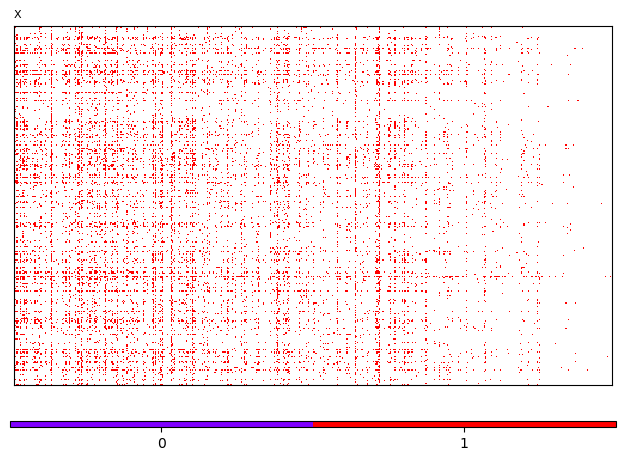

<Figure size 640x480 with 0 Axes>

In [3]:
# loading real-world data

from PyBMF.datasets import MovieLensData

data = MovieLensData(size="100k")
data.load()

idx = data.sample(factor_id=0, n_samples=300, seed=1000)
idx = data.sample(factor_id=1, n_samples=500, seed=1000)

data.show_matrix(scaling=0.5)

In [4]:
# splitting the data into train, validation and test

from PyBMF.datasets import RatioSplit, NoSplit

# split = RatioSplit(X=data.X, val_size=0.1, test_size=0.2, seed=1997)
split = NoSplit(X=data.X)

# split.negative_sample(
#     train_size=split.pos_train_size, 
#     val_size=split.pos_val_size, 
#     test_size=split.pos_test_size, 
#     seed=2023, type='popularity')
split.negative_sample(
    size=split.pos_size, 
    seed=2023, type='popularity')

X_train, X_val, X_test = split.X_train, split.X_val, split.X_test

[I] NoSplit, sampling positives
[I] RatioSplit, sampling positives
[I]   seed         : 1722740544
[I]   train_size   : 10754
[I]   val_size     : 0
[I]   test_size    : 0
[I]   seed         : 1722740544
[I] RatioSplit, sampling negatives
[I]   seed         : 2023
[I]   all_negatives: 139246
[I]   n_negatives  : 10754
[I]   train_size   : 10754
[I]   val_size     : 0
[I]   test_size    : 0
[I]   seed         : 2023


In [5]:
# shared parameters

k = 5
W = 'full'
task = 'reconstruction'

# Init `U`, `V` with NMF

[I] k            : 5
[I] U            : None
[I] V            : None
[I] beta_loss    : frobenius
[I] init_method  : nndsvd
[I] solver       : cd
[I] tol          : 0.0001
[I] max_iter     : 1000
[I] seed         : 2024
[I] verbose      : False
[I] display      : False
[I] save_model   : False
[I] Missing validation data.
[W] Missing testing data.
[I] name         : 2024-08-04 11-02-24-680578 NMFSklearn
[I] U, V existed. Skipping initialization.
[I] time elapsed :  0s


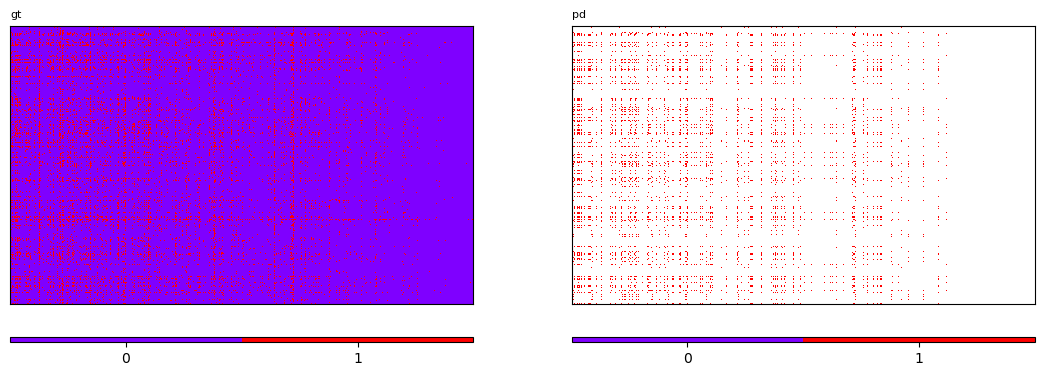

<Figure size 640x480 with 0 Axes>

In [6]:
from PyBMF.models import NMFSklearn, WNMF
from PyBMF.utils import show_factor_distribution

model_nmf = NMFSklearn(k=k, init_method='nndsvd', max_iter=1000, seed=2024)
model_nmf.fit(X_train=X_train, save_model=False)

# model_nmf = WNMF(k=k, W=W, beta_loss='frobenius', init_method='normal', max_iter=1000, seed=2024)
# model_nmf.fit(X_train=X_train, task='reconstruction', verbose=False, display=False, show_logs=False, show_result=True, save_model=False)

# `PNL-PF`

[I] k            : 5
[I] U            : (300, 5)
[I] V            : (500, 5)
[I] W            : full
[I] reg          : 1
[I] beta_loss    : frobenius
[I] solver       : mu
[I] link_lamda   : 5
[I] reg_growth   : 1.02
[I] max_reg      : 10000000000.0
[I] tol          : 0
[I] min_diff     : 0.001
[I] max_iter     : 10
[I] init_method  : custom
[I] normalize_method : balance
[I] seed         : 2024
[I] verbose      : False
[I] display      : False
[I] task         : reconstruction
[I] save_model   : False
[I] Missing validation data.
[W] Missing testing data.
[I] name         : 2024-08-04 11-02-25-154530 PNLPF
[I] Normalized from: U: [0.0000, 1.6549], V: [0.0000, 1.7642]
[I]              to: U: [0.0000, 1.2375], V: [0.0000, 1.2375]


[I] error: 3.23e+03, rec_error: 3.19e+03, reg: 1.22e+00, reg_error: 3.77e+01: : 11it [00:00, 16.02it/s]                      


[W] Stopped in advance: Reach maximum iteration
[I] time elapsed :  0s


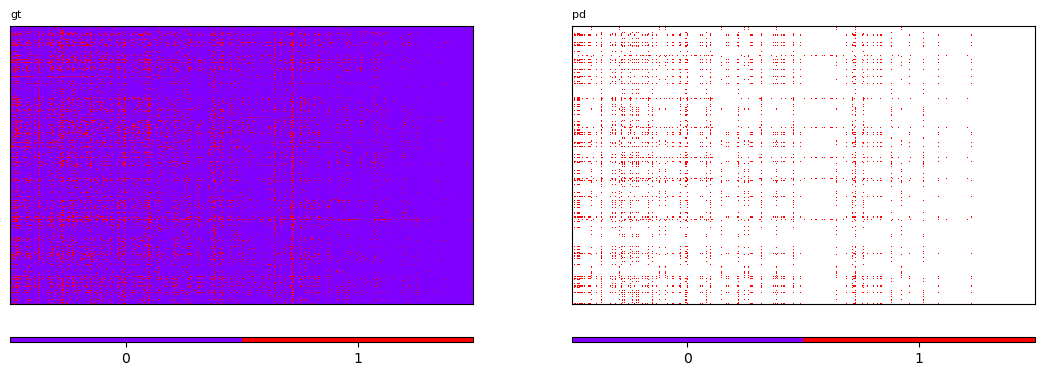

\
                                                                            
                 time iter        error    rec_error       reg  reg_error   
0   04/08/24 11:02:25    0  3289.212799  3265.135373  1.000000  24.077426   
1   04/08/24 11:02:25    1  3255.444669  3229.909603  1.000000  25.535066   
2   04/08/24 11:02:25    2  3245.478121  3217.717675  1.020000  27.760446   
3   04/08/24 11:02:25    3  3240.400461  3210.593173  1.040400  29.807288   
4   04/08/24 11:02:25    4  3237.041317  3205.574659  1.061208  31.466658   
5   04/08/24 11:02:25    5  3234.702701  3201.900814  1.082432  32.801887   
6   04/08/24 11:02:25    6  3233.268101  3199.478725  1.104081  33.789376   
7   04/08/24 11:02:25    7  3232.426667  3197.794496  1.126162  34.632171   
8   04/08/24 11:02:25    8  3231.882330  3196.446380  1.148686  35.435950   
9   04/08/24 11:02:25    9  3231.545500  3195.341377  1.171659  36.204123   
10  04/08/24 11:02:25   10  3231.371218  3194.427055  1.195093  36.944163   
11  04/08/24 11:02:25   11  3231.328044  3193.668974  1.218994  37.659070   

       train            
           0            
        RMSE       MAE  
0   0.208651  0.137582  
1   0.207522  0.136279  
2   0.207130  0.135335  
3   0.206901  0.134829  
4   0.206739  0.134531  
5   0.206620  0.134342  
6   0.206542  0.134206  
7   0.206488  0.134097  
8   0.206444  0.134011  
9   0.206409  0.133943  
10  0.206379  0.133889  
11  0.206355  0.133845

train                              
                              0                              
                 time    Recall Precision  Accuracy        F1
0   04/08/24 11:02:25  0.333085  0.668533  0.940347  0.444638
1   04/08/24 11:02:25  0.342477  0.663126  0.940387  0.451680
2   04/08/24 11:02:25  0.334666  0.676885  0.940847  0.447887
3   04/08/24 11:02:25  0.329552  0.681407  0.940887  0.444249
4   04/08/24 11:02:25  0.316998  0.688131  0.940733  0.434046
5   04/08/24 11:02:25  0.314581  0.690549  0.940753  0.432249
6   04/08/24 11:02:25  0.310954  0.694064  0.940773  0.429489
7   04/08/24 11:02:25  0.310396  0.694548  0.940773  0.429049
8   04/08/24 11:02:25  0.311605  0.691498  0.940680  0.429615
9   04/08/24 11:02:25  0.310303  0.694196  0.940753  0.428893
10  04/08/24 11:02:25  0.308815  0.694625  0.940713  0.427551
11  04/08/24 11:02:25  0.307792  0.695378  0.940707  0.426711

<Figure size 640x480 with 0 Axes>

In [7]:
from PyBMF.models import PNLPF
from PyBMF.utils import show_factor_distribution

# load U and V
U, V = model_nmf.U.copy(), model_nmf.V.copy()

# PNLPF
reg = 1
reg_growth = 1.02
max_iter = 10
min_diff = 1e-3
tol = 0
link_lamda = 5
init_method = 'custom' # 'custom', 'uniform', 'normal'

model_bmfps = PNLPF(k=k, U=U, V=V, W=W, reg=reg, reg_growth=reg_growth, init_method=init_method, max_iter=max_iter, min_diff=min_diff, tol=tol, link_lamda=link_lamda, seed=2024)
model_bmfps.fit(X_train=X_train, task=task, verbose=False, display=False, save_model=False)

# `BinaryMFPenalty`

[I] k            : 5
[I] U            : (300, 5)
[I] V            : (500, 5)
[I] W            : full
[I] reg          : 1
[I] beta_loss    : frobenius
[I] solver       : mu
[I] reg_growth   : 1.02
[I] max_reg      : 10000000000.0
[I] tol          : 0
[I] min_diff     : 0.001
[I] max_iter     : 10
[I] init_method  : custom
[I] normalize_method : balance
[I] seed         : 2024
[I] verbose      : False
[I] display      : False
[I] task         : reconstruction
[I] save_model   : False
[I] Missing validation data.
[W] Missing testing data.
[I] name         : 2024-08-04 11-02-26-409806 BinaryMFPenalty
[I] Normalized from: U: [0.0000, 1.2375], V: [0.0000, 1.2375]
[I]              to: U: [0.0000, 1.2375], V: [0.0000, 1.2375]


[I] error: 3.00e+03, rec_error: 2.97e+03, reg: 1.22e+00, reg_error: 2.84e+01: : 11it [00:00, 21.66it/s]                      


[W] Stopped in advance: Reach maximum iteration
[I] time elapsed :  0s


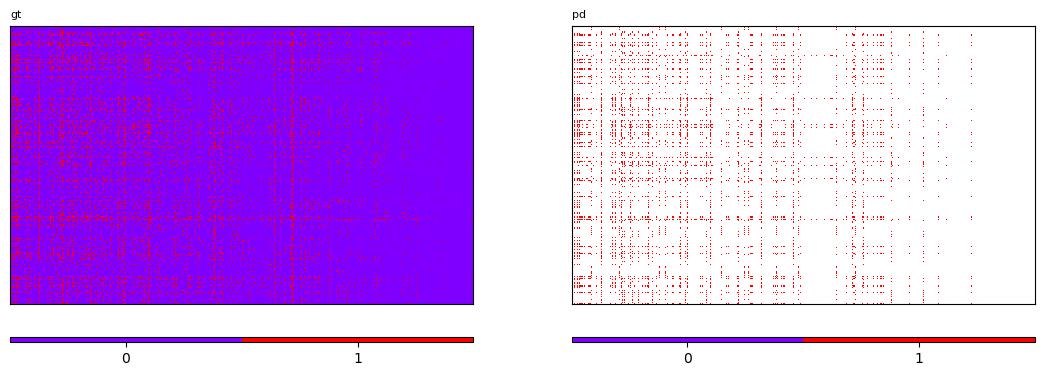

\
                                                                            
                 time iter        error    rec_error       reg  reg_error   
0   04/08/24 11:02:26    0  2990.787801  2966.710375  1.000000  24.077426   
1   04/08/24 11:02:26    1  2990.551714  2966.839880  1.000000  23.711834   
2   04/08/24 11:02:26    2  2990.972608  2966.896329  1.020000  24.076279   
3   04/08/24 11:02:26    3  2991.422566  2966.933582  1.040400  24.488985   
4   04/08/24 11:02:26    4  2991.889922  2966.964572  1.061208  24.925350   
5   04/08/24 11:02:26    5  2992.370918  2966.992074  1.082432  25.378844   
6   04/08/24 11:02:26    6  2992.863928  2967.017327  1.104081  25.846601   
7   04/08/24 11:02:26    7  2993.368189  2967.041116  1.126162  26.327072   
8   04/08/24 11:02:26    8  2993.883341  2967.063988  1.148686  26.819353   
9   04/08/24 11:02:26    9  2994.409238  2967.086333  1.171659  27.322905   
10  04/08/24 11:02:26   10  2994.945850  2967.108440  1.195093  27.837410   
11  04/08/24 11:02:26   11  2995.493223  2967.130529  1.218994  28.362693   

       train            
           0            
        RMSE       MAE  
0   0.198887  0.087533  
1   0.198892  0.087174  
2   0.198893  0.087131  
3   0.198895  0.087113  
4   0.198896  0.087100  
5   0.198897  0.087090  
6   0.198898  0.087081  
7   0.198898  0.087072  
8   0.198899  0.087063  
9   0.198900  0.087054  
10  0.198901  0.087045  
11  0.198901  0.087036

train                              
                              0                              
                 time    Recall Precision  Accuracy        F1
0   04/08/24 11:02:26  0.333085  0.668533  0.940347  0.444638
1   04/08/24 11:02:26  0.333085  0.668533  0.940347  0.444638
2   04/08/24 11:02:26  0.333085  0.668533  0.940347  0.444638
3   04/08/24 11:02:26  0.333085  0.668533  0.940347  0.444638
4   04/08/24 11:02:26  0.333364  0.668095  0.940333  0.444789
5   04/08/24 11:02:26  0.334015  0.667410  0.940320  0.445216
6   04/08/24 11:02:26  0.334015  0.667410  0.940320  0.445216
7   04/08/24 11:02:26  0.334015  0.667410  0.940320  0.445216
8   04/08/24 11:02:26  0.334015  0.667410  0.940320  0.445216
9   04/08/24 11:02:26  0.337270  0.667096  0.940420  0.448027
10  04/08/24 11:02:26  0.337270  0.667096  0.940420  0.448027
11  04/08/24 11:02:26  0.337270  0.667096  0.940420  0.448027

<Figure size 640x480 with 0 Axes>

In [8]:
from PyBMF.models import BinaryMFPenalty

model_bmfp = BinaryMFPenalty(k=k, U=U, V=V, W=W, reg=reg, reg_growth=reg_growth, init_method='custom', max_iter=max_iter, min_diff=min_diff, tol=tol, seed=2024)
model_bmfp.fit(X_train=X_train, X_val=None, X_test=None, task=task, verbose=False, display=False, save_model=False)